In [16]:
import pandas as pd

sentiment_df = pd.read_csv("fear_greed_index.csv")
trader_df = pd.read_csv("historical_data.csv")


In [17]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
trader_df['date'] = pd.to_datetime(trader_df['Timestamp IST'], format="%d-%m-%Y %H:%M").dt.date
trader_df['date'] = pd.to_datetime(trader_df['date'])  # Convert to datetime64


In [18]:
performance_daily = trader_df.groupby('date').agg({
    'Closed PnL': 'sum',
    'Execution Price': 'mean',
    'Size USD': 'sum',
    'Fee': 'sum'
}).reset_index()


In [19]:
merged_df = pd.merge(performance_daily, sentiment_df[['date', 'value', 'classification']], on='date', how='inner')


In [20]:
merged_df['PnL Category'] = pd.cut(merged_df['Closed PnL'],
                                   bins=[-float('inf'), 0, 1000, 10000, float('inf')],
                                   labels=['Loss', 'Low Profit', 'Moderate Profit', 'High Profit'])


In [21]:
summary_by_sentiment = merged_df.groupby('classification').agg({
    'Closed PnL': ['mean', 'sum'],
    'Execution Price': 'mean',
    'Size USD': 'mean',
    'Fee': 'mean'
}).round(2)


In [22]:
print("Sample merged data:")
print(merged_df.head())

print("\nSummary by market sentiment:")
print(summary_by_sentiment)


Sample merged data:
        date  Closed PnL  Execution Price   Size USD        Fee  value  \
0 2023-05-01    0.000000      1898.133333     477.00   0.000000     63   
1 2023-12-05    0.000000     11038.300000   50005.83  12.501455     75   
2 2023-12-14 -205.434737      8031.868818  113203.35  28.300831     72   
3 2023-12-15  -24.632034         2.982000   10609.95   2.652489     70   
4 2023-12-16    0.000000         0.384707   15348.77   3.837189     67   

  classification PnL Category  
0          Greed         Loss  
1  Extreme Greed         Loss  
2          Greed         Loss  
3          Greed         Loss  
4          Greed         Loss  

Summary by market sentiment:
               Closed PnL             Execution Price    Size USD      Fee
                     mean         sum            mean        mean     mean
classification                                                            
Extreme Fear     52793.59   739110.25         5697.30  8177447.25  1706.33
Extreme Greed

**Visualization for better understanding**

/tmp/ipython-input-29-1251100872.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='classification', y='Closed PnL', palette='Set2', showfliers=False)
/tmp/ipython-input-29-1251100872.py:12: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


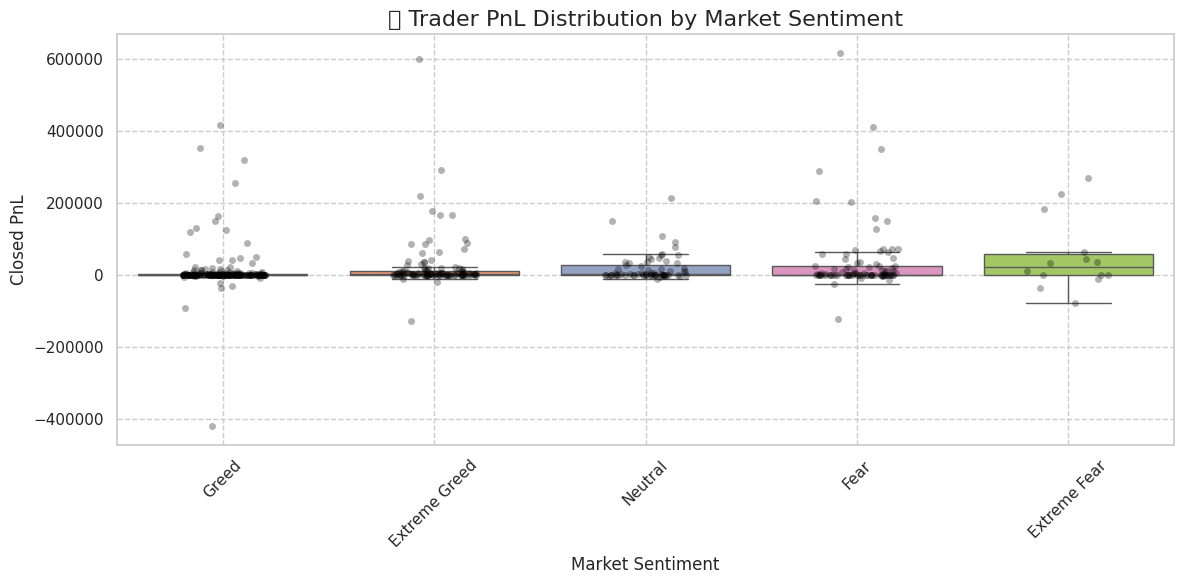

In [29]:
#Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL', palette='Set2', showfliers=False)
sns.stripplot(data=merged_df, x='classification', y='Closed PnL', color='black', alpha=0.3, jitter=0.2)
plt.title("📦 Trader PnL Distribution by Market Sentiment", fontsize=16)
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()


/tmp/ipython-input-30-2529180314.py:17: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


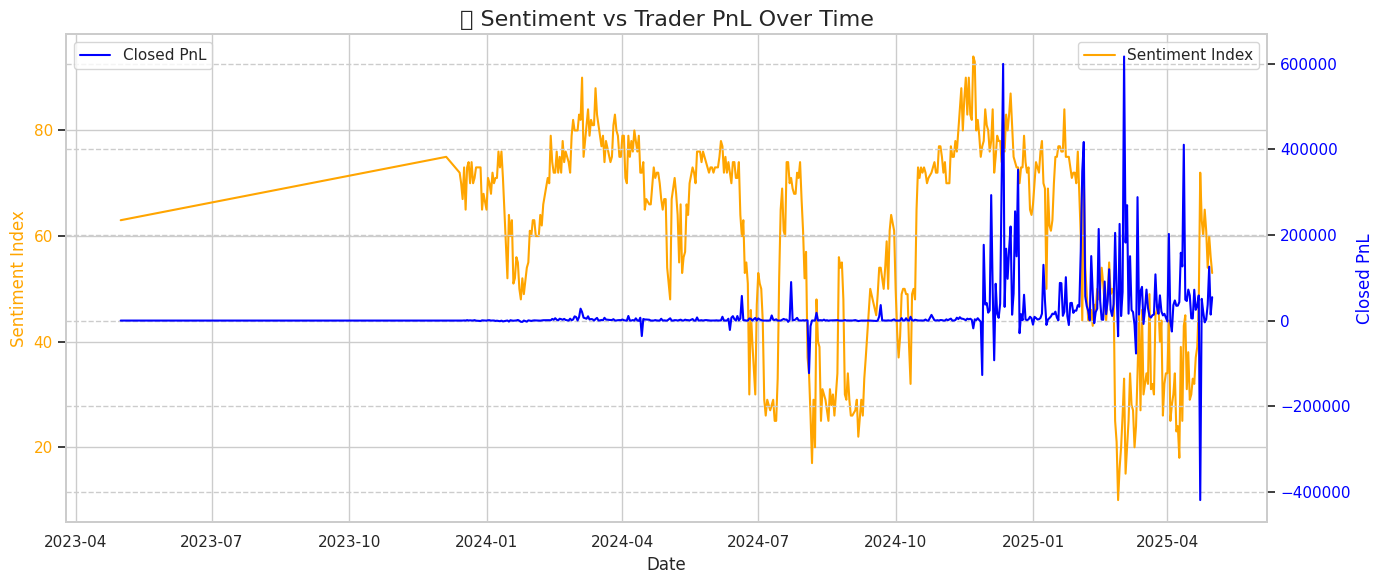

In [30]:
#Line Plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Sentiment Index
sns.lineplot(data=merged_df.sort_values('date'), x='date', y='value', ax=ax1, color='orange', label='Sentiment Index')
ax1.set_ylabel('Sentiment Index', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Closed PnL (second axis)
ax2 = ax1.twinx()
sns.lineplot(data=merged_df.sort_values('date'), x='date', y='Closed PnL', ax=ax2, color='blue', label='Closed PnL')
ax2.set_ylabel('Closed PnL', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title("📈 Sentiment vs Trader PnL Over Time", fontsize=16)
ax1.set_xlabel("Date")
plt.grid(True, linestyle='--')
fig.tight_layout()
plt.show()


/tmp/ipython-input-31-2846392234.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pnl_by_sentiment.index, y=avg_pnl_by_sentiment.values, palette='coolwarm')
/tmp/ipython-input-31-2846392234.py:10: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


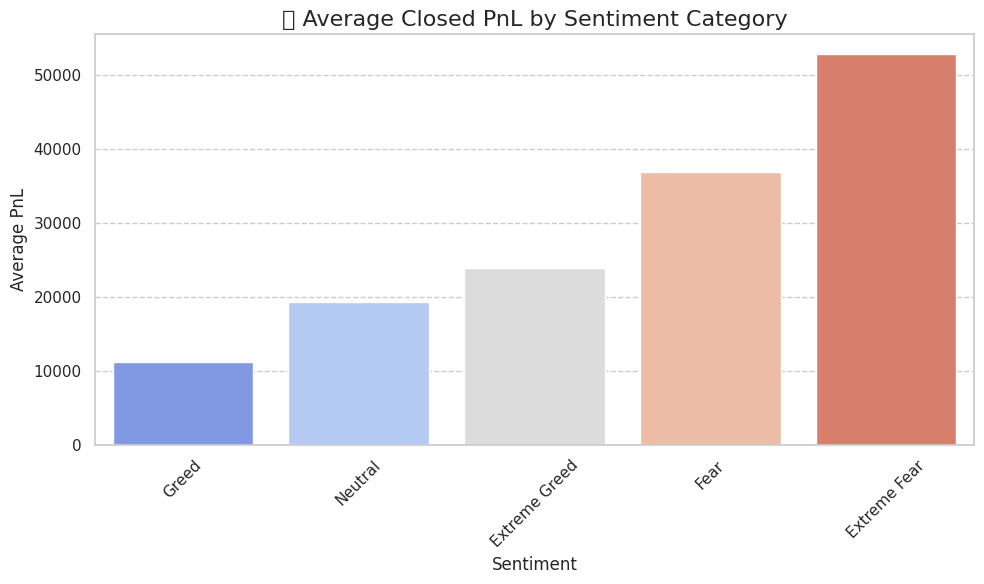

In [31]:
#Bar Plot
avg_pnl_by_sentiment = merged_df.groupby('classification')['Closed PnL'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_pnl_by_sentiment.index, y=avg_pnl_by_sentiment.values, palette='coolwarm')
plt.title("💰 Average Closed PnL by Sentiment Category", fontsize=16)
plt.xlabel("Sentiment")
plt.ylabel("Average PnL")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


/tmp/ipython-input-33-1910636714.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


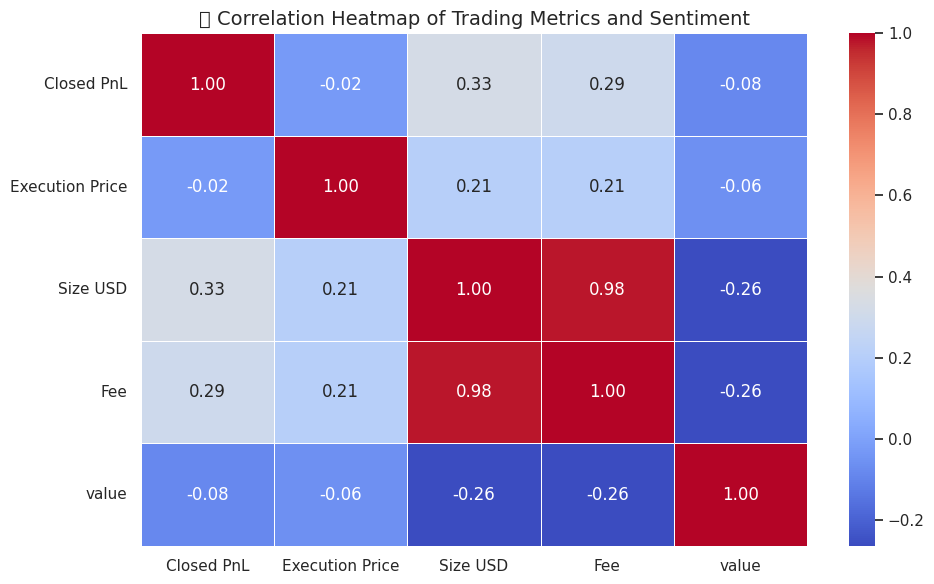

In [33]:
#HeatMap
import numpy as np

plt.figure(figsize=(10, 6))
corr = merged_df[['Closed PnL', 'Execution Price', 'Size USD', 'Fee', 'value']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("📊 Correlation Heatmap of Trading Metrics and Sentiment", fontsize=14)
plt.tight_layout()
plt.show()
